## Import extension

In [103]:
!pip install geopandas

In [104]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Initialise files

In [105]:
df2021 = pd.read_csv("/content/gdrive/MyDrive/ESILV/IA/valeursfoncieres-2021.txt",sep="|")
df2020 = pd.read_csv("/content/gdrive/MyDrive/ESILV/IA/valeursfoncieres-2020.txt",sep="|")
dfcovid = pd.read_csv("/content/gdrive/MyDrive/ESILV/IA/synthese-fra.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18,23,24,25,26,27,28,29,30,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [106]:
nbcolumn2020=df2020.shape[0]
nbcolumn2021=df2021.shape[0]

prc_Nan=0.75
max_number_of_nas_2020 = nbcolumn2020 * prc_Nan
max_number_of_nas_2021 = nbcolumn2021 * prc_Nan

clean2020 = df2020.loc[:, (df2020.isnull().sum(axis=0) <= max_number_of_nas_2020)]
clean2021 = df2021.loc[:, (df2021.isnull().sum(axis=0) <= max_number_of_nas_2021)]

## Initialise Map

In [107]:
geo= gpd.read_file('https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson')

In [108]:
codes = [_ for _ in set(geo.code) if len(_) < 3]
metropole = geo[geo.code.isin(codes)]

Paris= metropole.drop(metropole[(metropole.code!="75") & (metropole.code!="77") & (metropole.code!="78") & (metropole.code!="91") & (metropole.code!="92") & (metropole.code!="93") & (metropole.code!="94") & (metropole.code!="95")].index)
RhoneAlpes = metropole.drop(metropole[(metropole.code!="03") & (metropole.code!="42") & (metropole.code!="69") & (metropole.code!="01") & (metropole.code!="74") & (metropole.code!="63") & (metropole.code!="43") & (metropole.code!="15") & (metropole.code!="07")& (metropole.code!="26")& (metropole.code!="38")& (metropole.code!="73")].index)
Bretagne = metropole.drop(metropole[(metropole.code!="29") & (metropole.code!="22") & (metropole.code!="35") & (metropole.code!="56")].index)
Nouvelle_Aquitaine = metropole.drop(metropole[(metropole.code!="79") & (metropole.code!="86") & (metropole.code!="87") & (metropole.code!="23") & (metropole.code!="17") & (metropole.code!="16") & (metropole.code!="24") & (metropole.code!="33") & (metropole.code!="47")& (metropole.code!="40")& (metropole.code!="64") & (metropole.code!="19")].index)
Occitanie = metropole.drop(metropole[(metropole.code!="46") & (metropole.code!="12") & (metropole.code!="48") & (metropole.code!="30") & (metropole.code!="82") & (metropole.code!="81") & (metropole.code!="34") & (metropole.code!="32") & (metropole.code!="31")& (metropole.code!="65")& (metropole.code!="09")& (metropole.code!="11")& (metropole.code!="66")].index)
ProvenceAlpes_coteDAzure= metropole.drop(metropole[(metropole.code!="05") & (metropole.code!="04") & (metropole.code!="06") & (metropole.code!="84") & (metropole.code!="13") & (metropole.code!="83")].index)
Corse = metropole.drop(metropole[(metropole.code != '2B') & (metropole.code != "2A")].index)
Bourgogne_FrancheCompte = metropole.drop(metropole[(metropole.code!="89") & (metropole.code!="90") & (metropole.code!="21") & (metropole.code!="70") & (metropole.code!="58") & (metropole.code!="71") & (metropole.code!="39") & (metropole.code!="25")].index)
Grand_Est = metropole.drop(metropole[(metropole.code!="08") & (metropole.code!="55") & (metropole.code!="57") & (metropole.code!="54") & (metropole.code!="67") & (metropole.code!="51") & (metropole.code!="10") & (metropole.code!="52") & (metropole.code!="88")& (metropole.code!="68")].index)
Centre_ValDeLoire = metropole.drop(metropole[(metropole.code!="28") & (metropole.code!="45") & (metropole.code!="41") & (metropole.code!="37") & (metropole.code!="36") & (metropole.code!="18")  ].index)
Pays_DeLaLoire = metropole.drop(metropole[(metropole.code!="53") & (metropole.code!="72") & (metropole.code!="49") & (metropole.code!="44") & (metropole.code!="85")].index)
Normandie = metropole.drop(metropole[(metropole.code!="76") & (metropole.code!="27") & (metropole.code!="14") & (metropole.code!="50") & (metropole.code!="61")].index)
Hauts_DeFrance = metropole.drop(metropole[(metropole.code!="62") & (metropole.code!="59") & (metropole.code!="80") & (metropole.code!="60") & (metropole.code!="02")].index)

In [121]:
# Dico de Region
Region = {"Paris" : Paris,
          "RhoneAlpes" : RhoneAlpes,
          "Bretagne" : Bretagne,
          "Nouvelle_Aquitaine" : Nouvelle_Aquitaine,
          "Occitanie" : Occitanie,
          "ProvenceAlpes_coteDAzure" : ProvenceAlpes_coteDAzure,
          "Corse" : Corse,
          "Bourgogne_FrancheCompte" : Bourgogne_FrancheCompte,
          "Grand_Est" : Grand_Est,
          "Centre_ValDeLoire" : Centre_ValDeLoire,
          "Pays_DeLaLoire" : Pays_DeLaLoire,
          "Normandie" : Normandie,
          "Hauts_DeFrance" : Hauts_DeFrance,
          "metropole" : metropole}

## exploit Data

In [110]:
clean2020["Valeur fonciere"]=clean2020["Valeur fonciere"].replace(',','.',regex=True).astype(float)
clean2020["prix/m^2"] = clean2020["Valeur fonciere"] / clean2020["Surface reelle bati"]
clean2020["prix/m^2"] = clean2020["prix/m^2"].apply(lambda x: x if x!=np.inf else 0)
clean2020["compte"]=1

clean2021["Valeur fonciere"]=clean2021["Valeur fonciere"].replace(',','.',regex=True).astype(float)
clean2021["prix/m^2"] = clean2021["Valeur fonciere"] / clean2021["Surface reelle bati"]
clean2021["prix/m^2"] = clean2021["prix/m^2"].apply(lambda x: x if x!=np.inf else 0)
clean2021["compte"]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Prix Surface

In [111]:
PrixSurface2020 = clean2020.groupby('Code departement').mean().reset_index().drop(columns = ['No disposition','No voie', 'Code postal', 'Code commune', 'No plan','Nombre de lots'
                                                                                            , 'Code type local', 'Nombre pieces principales'], axis = 1)
PrixSurface2021 = clean2021.groupby('Code departement').mean().reset_index().drop(columns = ['No disposition','No voie', 'Code postal', 'Code commune', 'No plan','Nombre de lots'
                                                                                            , 'Code type local', 'Nombre pieces principales'], axis = 1)

PrixSurface2020["Code departement"]=PrixSurface2020["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))
df_new_line = pd.DataFrame([['67',np.nan] , ['68',np.nan] , ['57',np.nan]] , columns=['Code departement','prix/m^2'])
PrixSurface2020 = pd.concat([PrixSurface2020 , df_new_line] , ignore_index=True)
PrixSurface2020.drop([95,98])

PrixSurface2021["Code departement"]=PrixSurface2021["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))
df_new_line = pd.DataFrame([['67',np.nan] , ['68',np.nan] , ['57',np.nan]] , columns=['Code departement','prix/m^2'])
PrixSurface2021 = pd.concat([PrixSurface2021 , df_new_line] , ignore_index=True)
PrixSurface2021.drop([95,98])

,Code departement,Valeur fonciere,Surface reelle bati,Surface terrain,prix/m^2,compte
0,01,267000.320249,72.176691,1851.674335,2272.310748,1.0
1,02,166006.652918,85.990208,2996.776157,1440.310648,1.0
2,03,307430.661136,71.741740,3856.633118,6816.714815,1.0
3,04,277284.965650,108.248137,3148.063922,2574.400382,1.0
4,05,153659.756344,47.695492,1502.591885,1934.708641,1.0
...,...,...,...,...,...,...
96,2A,603484.774664,66.157738,4397.183695,10358.898612,1.0
97,2B,236459.655355,52.488491,2361.612444,2470.153988,1.0
99,67,NaN,NaN,NaN,NaN,NaN
100,68,NaN,NaN,NaN,NaN,NaN


In [112]:
#Dico Annee
PrixSurfaceAnnee = {2020 : PrixSurface2020,
                    2021 : PrixSurface2021}

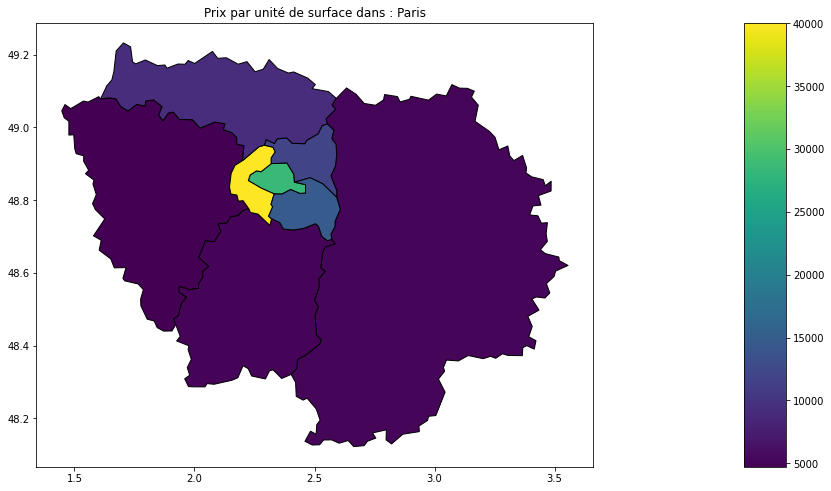

In [117]:
def affiche_PrixSurface(annee = 2020, nom_region = "metropole"):
    merged =  PrixSurfaceAnnee[annee].reset_index(drop=False).merge(Region[nom_region], left_on="Code departement", right_on="code")
    merged.shape
    geomerged = gpd.GeoDataFrame(merged)
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))

    cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

    geomerged.plot(column="prix/m^2", ax=ax, edgecolor='black', legend=True, cax=cax,missing_kwds={'color': 'lightgrey'})
    ax.set_title("Prix par unité de surface dans : " + nom_region);

affiche_PrixSurface(2021, "Paris")

### Nombre de ventes

In [136]:
NmbVentes2020 = clean2020.groupby('Code departement').sum().reset_index().drop(columns = ['No disposition','No voie', 'Code postal', 'Code commune', 'No plan','Nombre de lots'
                                                                                            , 'Code type local', 'Nombre pieces principales'], axis = 1)
NmbVentes2021 = clean2021.groupby('Code departement').sum().reset_index().drop(columns = ['No disposition','No voie', 'Code postal', 'Code commune', 'No plan','Nombre de lots'
                                                                                            , 'Code type local', 'Nombre pieces principales'], axis = 1)

NmbVentes2020["Code departement"] = NmbVentes2020["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))
df_new_line = pd.DataFrame([['67',0] , ['68',0] , ['57',0]] , columns=['Code departement','compte'])
NmbVentes2020 = pd.concat([NmbVentes2020 , df_new_line] , ignore_index=True)
NmbVentes2020.drop([95,98])

NmbVentes2021["Code departement"] = NmbVentes2021["Code departement"].apply(lambda x : str(0) + str(x) if len(str(x))==1 else str(x))
df_new_line = pd.DataFrame([['67',0] , ['68',0] , ['57',0]] , columns=['Code departement','compte'])
NmbVentes2021 = pd.concat([NmbVentes2021 , df_new_line] , ignore_index=True)
NmbVentes2021.drop([95,98])

,Code departement,Valeur fonciere,Surface reelle bati,Surface terrain,prix/m^2,compte
0,01,8.762951e+09,1192792.0,46282600.0,3.753176e+07,33342
1,02,5.948350e+09,1607071.0,101051292.0,2.684739e+07,36040
2,03,6.633739e+09,911981.0,72269448.0,8.653819e+07,21668
3,04,1.869455e+09,392183.0,16055126.0,9.327053e+06,6751
4,05,7.666085e+08,129064.0,4407102.0,5.204366e+06,5009
...,...,...,...,...,...,...
96,2A,3.692723e+09,222290.0,12567151.0,3.470231e+07,6130
97,2B,6.322931e+08,61569.0,2656814.0,2.865379e+06,2731
99,67,NaN,NaN,NaN,NaN,0
100,68,NaN,NaN,NaN,NaN,0


In [137]:
#Dico Annee
NmbVentesAnnee = {2020 : NmbVentes2020,
                  2021 : NmbVentes2021}

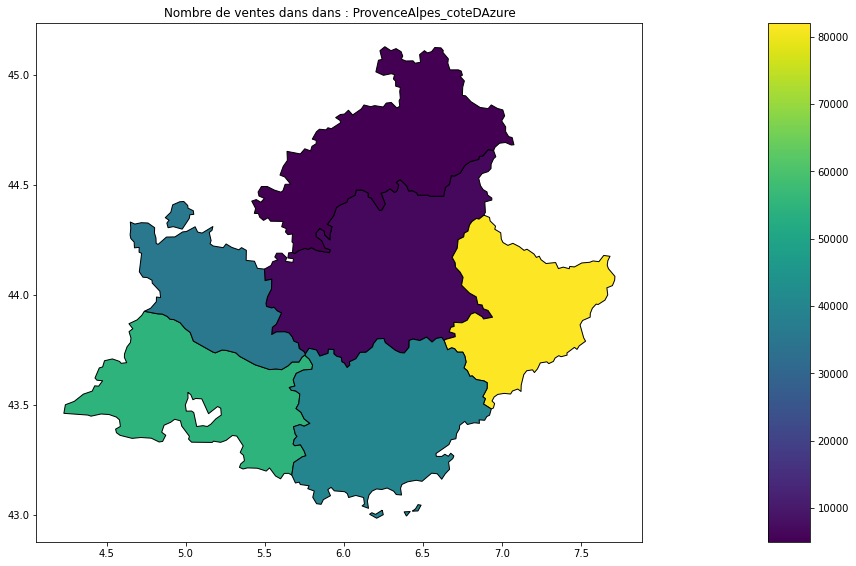

In [141]:
def affiche_NmbVentes(annee = 2020, nom_region = "metropole"):
    merged =  NmbVentesAnnee[2021].reset_index(drop=False).merge(Region[nom_region], left_on="Code departement", right_on="code")
    merged.shape
    geomerged = gpd.GeoDataFrame(merged)
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))

    cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

    geomerged.plot(column="compte", ax=ax, edgecolor='black', legend=True, cax=cax,missing_kwds={'color': 'lightgrey'})
    ax.set_title("Nombre de ventes dans dans : " + nom_region);

affiche_NmbVentes(nom_region = "ProvenceAlpes_coteDAzure", annee = 2021)

#### Difference 2020 - 2021

In [146]:
DiffNmbVentes = pd.DataFrame()
DiffNmbVentes['Code departement'] = PrixSurface2020["Code departement"]
DiffNmbVentes['Difference Prix'] = PrixSurface2021["prix/m^2"] - PrixSurface2020["prix/m^2"]
DiffNmbVentes['Difference compte'] = NmbVentes2021["compte"] - NmbVentes2020["compte"]
DiffNmbVentes

,Code departement,Difference Prix,Difference compte
0,01,-404.598243,-5767
1,02,-331.318102,10301
2,03,5096.622102,-340
3,04,464.721860,-3415
4,05,-1415.649431,-8598
...,...,...,...
97,2B,-559.527456,-6542
98,30,43.825245,2931
99,67,NaN,0
100,68,NaN,0


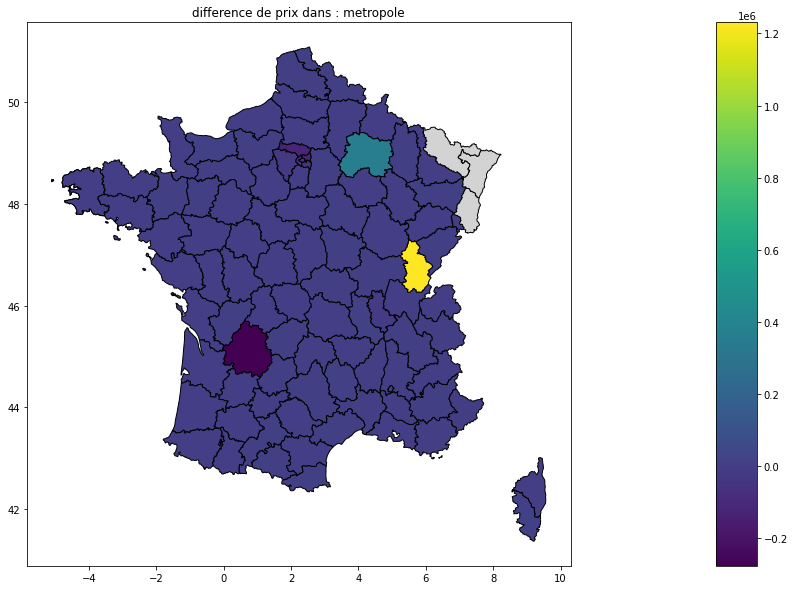

In [158]:
def afficheDiff(type = 1, nom_region = "metropole"):
    merged =  DiffNmbVentes.reset_index(drop=False).merge(Region[nom_region], left_on="Code departement", right_on="code")
    merged.shape
    geomerged = gpd.GeoDataFrame(merged)
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))

    cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)
    if type == 1 :
      geomerged.plot(column="Difference compte", ax=ax, edgecolor='black', legend=True, cax=cax,missing_kwds={'color': 'lightgrey'})
      ax.set_title("difference Nombre de ventes dans : " + nom_region);
    elif type == 2:
      geomerged.plot(column="Difference Prix", ax=ax, edgecolor='black', legend=True, cax=cax,missing_kwds={'color': 'lightgrey'})
      ax.set_title("difference de prix dans : " + nom_region);

  
afficheDiff(type = 2, nom_region = "metropole")